# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pyplt
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import nltk
import re
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import math
from collections import Counter

In [2]:
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df=pd.read_csv("zomato.csv",encoding='utf8')
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [6]:
df.shape

(51717, 17)

# **Data Cleaning**

In [7]:
#Deleting Unnnecessary Columns
df=df.drop(['url','dish_liked','phone','address'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [8]:
df = df.drop(['menu_item'],axis=1)

In [9]:
obj=pd.DataFrame(df)
dataTypeSeries = obj.dtypes
print(dataTypeSeries)

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [10]:
#DataCleaning
#1.checking for null values in the first column
df=df.dropna(axis=0)
r,c=df.shape
print(r,c)
df.isnull()

43533 12


name  online_order  book_table   rate  votes  location  rest_type  \
0      False         False       False  False  False     False      False   
1      False         False       False  False  False     False      False   
2      False         False       False  False  False     False      False   
3      False         False       False  False  False     False      False   
4      False         False       False  False  False     False      False   
...      ...           ...         ...    ...    ...       ...        ...   
51709  False         False       False  False  False     False      False   
51711  False         False       False  False  False     False      False   
51712  False         False       False  False  False     False      False   
51715  False         False       False  False  False     False      False   
51716  False         False       False  False  False     False      False   

       cuisines  approx_cost(for two people)  reviews_list  listed_in(type)  \
0         False                        False         False            False   
1         False                        False         False            False   
2         False                        False         False            False   
3         False                        False         False            False   
4         False                        False         False            False   
...         ...                          ...           ...              ...   
51709     False                        False         False            False   
51711     False                        False         False            False   
51712     False                        False         False            False   
51715     False                        False         False            False   
51716     False                        False         False            False   

       listed_in(city)  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
51709            False  
51711            False  
51712            False  
51715            False  
51716            False  

[43533 rows x 12 columns]

In [11]:
#Removing the Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43480 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43480 non-null  object
 1   online_order                 43480 non-null  object
 2   book_table                   43480 non-null  object
 3   rate                         43480 non-null  object
 4   votes                        43480 non-null  int64 
 5   location                     43480 non-null  object
 6   rest_type                    43480 non-null  object
 7   cuisines                     43480 non-null  object
 8   approx_cost(for two people)  43480 non-null  object
 9   reviews_list                 43480 non-null  object
 10  listed_in(type)              43480 non-null  object
 11  listed_in(city)              43480 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.3+ MB


In [13]:
#Once again checking for duplicate values
boolean = df.duplicated().any()
print(boolean)

False


In [14]:
#checking for percentage of null values in each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
online_order - 0%
book_table - 0%
rate - 0%
votes - 0%
location - 0%
rest_type - 0%
cuisines - 0%
approx_cost(for two people) - 0%
reviews_list - 0%
listed_in(type) - 0%
listed_in(city) - 0%


In [15]:
df.describe(include='all')

name online_order book_table   rate         votes location  \
count             43480        43480      43480  43480  43480.000000    43480   
unique             7112            2          2     64           NaN       92   
top     Cafe Coffee Day          Yes         No    NEW           NaN      BTM   
freq                 89        28159      37059   2194           NaN     4201   
mean                NaN          NaN        NaN    NaN    334.568468      NaN   
std                 NaN          NaN        NaN    NaN    864.824067      NaN   
min                 NaN          NaN        NaN    NaN      0.000000      NaN   
25%                 NaN          NaN        NaN    NaN     17.000000      NaN   
50%                 NaN          NaN        NaN    NaN     64.000000      NaN   
75%                 NaN          NaN        NaN    NaN    255.000000      NaN   
max                 NaN          NaN        NaN    NaN  16832.000000      NaN   

          rest_type      cuisines approx_cost(for two people) reviews_list  \
count         43480         43480                       43480        43480   
unique           87          2487                          66        21576   
top     Quick Bites  North Indian                         300           []   
freq          14986          2241                        5701         2301   
mean            NaN           NaN                         NaN          NaN   
std             NaN           NaN                         NaN          NaN   
min             NaN           NaN                         NaN          NaN   
25%             NaN           NaN                         NaN          NaN   
50%             NaN           NaN                         NaN          NaN   
75%             NaN           NaN                         NaN          NaN   
max             NaN           NaN                         NaN          NaN   

       listed_in(type) listed_in(city)  
count            43480           43480  
unique               7              30  
top           Delivery             BTM  
freq             21623            2747  
mean               NaN             NaN  
std                NaN             NaN  
min                NaN             NaN  
25%                NaN             NaN  
50%                NaN             NaN  
75%                NaN             NaN  
max                NaN             NaN

In [16]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'type', 'city'],
      dtype='object')

In [17]:
df1 = df.copy()

In [18]:
df['cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: cost, Length: 43480, dtype: object

In [19]:
#Some Transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))

In [20]:
df['cost'] = df['cost'].astype(float) # Changing the cost to Float

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43480 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43480 non-null  object 
 1   online_order  43480 non-null  object 
 2   book_table    43480 non-null  object 
 3   rate          43480 non-null  object 
 4   votes         43480 non-null  int64  
 5   location      43480 non-null  object 
 6   rest_type     43480 non-null  object 
 7   cuisines      43480 non-null  object 
 8   cost          43480 non-null  float64
 9   reviews_list  43480 non-null  object 
 10  type          43480 non-null  object 
 11  city          43480 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.3+ MB


In [22]:
#Reading Rate of dataset
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [24]:
df.head()

name online_order book_table  rate  votes      location  \
0                  Jalsa          Yes        Yes   4.1    775  Banashankari   
1         Spice Elephant          Yes         No   4.1    787  Banashankari   
2        San Churro Cafe          Yes         No   3.8    918  Banashankari   
3  Addhuri Udupi Bhojana           No         No   3.7     88  Banashankari   
4          Grand Village           No         No   3.8    166  Basavanagudi   

             rest_type                        cuisines   cost  \
0        Casual Dining  North Indian, Mughlai, Chinese  800.0   
1        Casual Dining     Chinese, North Indian, Thai  800.0   
2  Cafe, Casual Dining          Cafe, Mexican, Italian  800.0   
3          Quick Bites      South Indian, North Indian  300.0   
4        Casual Dining        North Indian, Rajasthani  600.0   

                                        reviews_list    type          city  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

# **EDA**

In [25]:
fig = go.Figure(data=[go.Histogram(y=df['location'])])
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [26]:
# Here we use a column with categorical data
fig = px.histogram(df, x="location",color='online_order')
fig.show()

In [27]:
# Here we use a column with categorical data
fig = px.histogram(df, x="location",color='book_table')
fig.show()

In [28]:
# Here we use a column with categorical data
fig = px.histogram(df, x="location",color='type')
fig.show()

<AxesSubplot:>

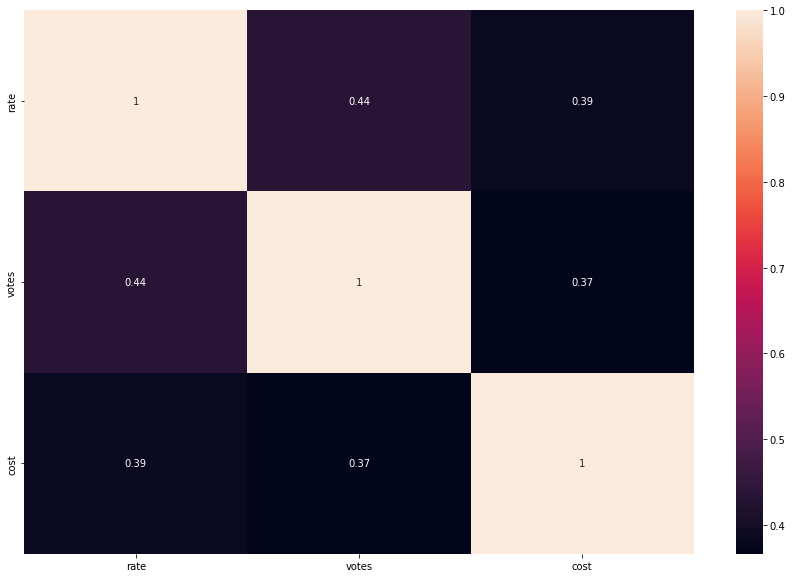

In [29]:
f = pyplt.figure()
f.set_figwidth(15)
f.set_figheight(10)
corr = df.corr()
sns.heatmap(corr,annot=True)

In [30]:
fig = px.scatter(df, x="votes", y="rate", color="online_order",
                 size='cost')
fig.show()

In [31]:
fig = px.scatter(df, x="votes", y="rate", color="type",
                 size='cost')
fig.show()

In [32]:
chains=df['name'].value_counts()[:20]
fig = px.bar(x=chains.index, y=chains,color=chains)
fig.show()

# **Text PreProcessing of Reviews**

In [33]:
import ast

In [34]:
def get_text(x):
    txt=''
    x=ast.literal_eval(x)
    for i in x:
        txt=txt+i[1]
    return txt
df['txt_review']=df.reviews_list.apply(lambda x : get_text(x))

In [35]:
#Converting the text into lower case

df.loc[:,"txt_review"] = df.txt_review.apply(lambda x : str.lower(x))

In [36]:
#Removing the punctuations from the text

import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["txt_review"] = df["txt_review"].apply(lambda text: remove_punctuation(text))

In [37]:
#Removing the numerics present in the text

df.loc[:,"txt_review"] = df.txt_review.apply(lambda x : re.sub(r'\d+','',x))

In [38]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["txt_review"] = df["txt_review"].apply(lambda text: remove_urls(text))

In [39]:
#Removing the Stop Words present in the text

from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
#stop_words = get_s.top_words('en')
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s
df.loc[:,"txt_review"] = df.txt_review.apply(lambda x: remove_stopWords(x))

In [40]:
regex = re.compile('[^a-zA-Z ]')
#First parameter is the replacement, second parameter is your input string
#regex.sub('', 'ab3d*E')
df.loc[:,"txt_review"] = df.txt_review.apply(lambda x : regex.sub('',x))

In [41]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'type', 'city',
       'txt_review'],
      dtype='object')

In [42]:
# Randomly sample 50% of your dataframe
df_sample = df.sample(frac=0.5)

# **EDA of reviews**

In [43]:
def word_cloud(words):
    comment_words = ""
    stopwords = set(STOPWORDS)
    for val in words:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens) + " "
    word_cloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                            min_font_size = 10).generate(comment_words)
    pyplt.figure(figsize = (8, 13), facecolor = None)
    pyplt.imshow(word_cloud)
    pyplt.axis("off")
    pyplt.tight_layout(pad = 0)
    pyplt.show()

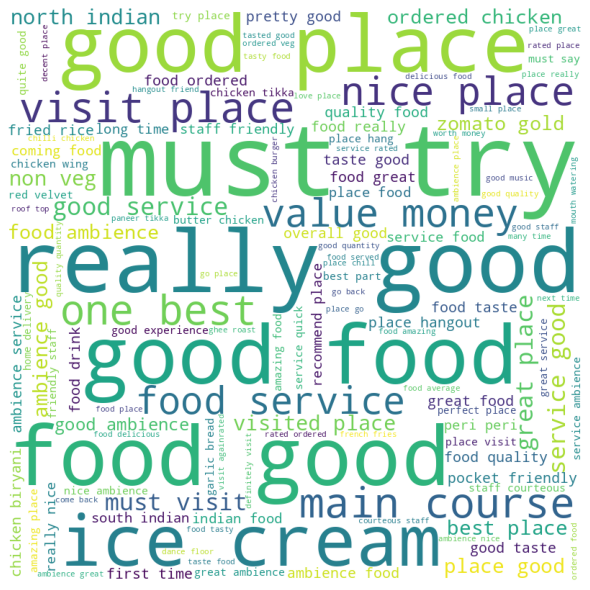

In [44]:
word_cloud(df_sample['txt_review'])
#word_cloud for entire dataset

In [45]:
# docs = [row['txt_review'] for index,row in df_sample.iterrows()]
# vec_s = CountVectorizer()
# X_s = vec_s.fit_transform(docs)
# tdm_s = pd.DataFrame(X_s.toarray(), columns=vec_s.get_feature_names())
# tdm_s

In [46]:
# tdm_s.dtypes

In [47]:
df_sample

name online_order book_table  rate  \
19174                       The Mangalorean          Yes        Yes   4.1   
18550  Public - The Rooftop Bar And Kitchen           No        Yes   4.3   
37466                        The World Cafe           No         No   3.8   
10642                       The Grill House          Yes        Yes   4.1   
29007                        Gam's Delicacy          Yes        Yes   4.2   
...                                     ...          ...        ...   ...   
19652                             Have More           No        Yes   3.9   
11940                               Fatso's          Yes         No   3.8   
20204                             Just Bake          Yes         No   2.9   
6459                           Nawabi Zaica          Yes         No   3.5   
14391                       Manjit Da Dhaba          Yes         No   4.3   

       votes               location           rest_type  \
19174    229           Kammanahalli       Casual Dining   
18550    966      Bannerghatta Road  Casual Dining, Bar   
37466     32           Malleshwaram                Cafe   
10642    765                 Ulsoor  Casual Dining, Bar   
29007    325  Koramangala 7th Block       Casual Dining   
...      ...                    ...                 ...   
19652    198           Kammanahalli       Casual Dining   
11940     72           Brigade Road                Cafe   
20204     19                 Hennur              Bakery   
6459      19           Marathahalli       Casual Dining   
14391    783            Frazer Town         Quick Bites   

                                          cuisines    cost  \
19174                 Konkan, Mangalorean, Seafood   550.0   
18550  North Indian, South Indian, Andhra, Chinese  1000.0   
37466                                         Cafe   600.0   
10642            American, Mexican, Italian, Steak  1200.0   
29007              North Indian, Chinese, Assamese   800.0   
...                                            ...     ...   
19652                                 North Indian   700.0   
11940              Cafe, American, Italian, Burger   650.0   
20204                             Bakery, Desserts   400.0   
6459                North Indian, Mughlai, Chinese   600.0   
14391                                 North Indian   300.0   

                                            reviews_list           type  \
19174  [('Rated 3.0', "RATED\n  Since I've never tast...       Delivery   
18550  [('Rated 4.0', 'RATED\n  Last Friday, I went o...       Dine-out   
37466  [('Rated 2.0', 'RATED\n  I wish the taste of t...       Dine-out   
10642  [('Rated 4.0', "RATED\n  This place is just op...  Pubs and bars   
29007  [('Rated 5.0', 'RATED\n  I have been missing A...       Dine-out   
...                                                  ...            ...   
19652  [('Rated 4.0', 'RATED\n  Have been to this pla...       Dine-out   
11940  [('Rated 3.0', 'RATED\n  On one hand, loved th...       Delivery   
20204  [('Rated 1.0', 'RATED\n  very low quality cake...       Delivery   
6459   [('Rated 5.0', 'RATED\n  taste is very nice.\n...       Dine-out   
14391  [('Rated 4.0', 'RATED\n  Authentic veggie only...       Delivery   

                        city  \
19174           Kalyan Nagar   
18550               JP Nagar   
37466            Rajajinagar   
10642          Church Street   
29007  Koramangala 7th Block   
...                      ...   
19652           Kalyan Nagar   
11940            Frazer Town   
20204           Kammanahalli   
6459             Brookefield   
14391            Indiranagar   

                                              txt_review  
19174  rated since ive never tasted mangalorean cuisi...  
18550  rated last friday went friend huge rooftop res...  
37466  rated wish taste coffee matched upto ambience ...  
10642  rated place opposite conrad hotel starters cla...  
29007  rated missing assamese food since long mumbai ...  
...                 

In [48]:
df_sc=df_sample.copy()

In [49]:
df_sample.set_index('name', inplace=True)

In [50]:
df_sample

online_order book_table  rate  votes  \
name                                                                        
The Mangalorean                               Yes        Yes   4.1    229   
Public - The Rooftop Bar And Kitchen           No        Yes   4.3    966   
The World Cafe                                 No         No   3.8     32   
The Grill House                               Yes        Yes   4.1    765   
Gam's Delicacy                                Yes        Yes   4.2    325   
...                                           ...        ...   ...    ...   
Have More                                      No        Yes   3.9    198   
Fatso's                                       Yes         No   3.8     72   
Just Bake                                     Yes         No   2.9     19   
Nawabi Zaica                                  Yes         No   3.5     19   
Manjit Da Dhaba                               Yes         No   4.3    783   

                                                   location  \
name                                                          
The Mangalorean                                Kammanahalli   
Public - The Rooftop Bar And Kitchen      Bannerghatta Road   
The World Cafe                                 Malleshwaram   
The Grill House                                      Ulsoor   
Gam's Delicacy                        Koramangala 7th Block   
...                                                     ...   
Have More                                      Kammanahalli   
Fatso's                                        Brigade Road   
Just Bake                                            Hennur   
Nawabi Zaica                                   Marathahalli   
Manjit Da Dhaba                                 Frazer Town   

                                               rest_type  \
name                                                       
The Mangalorean                            Casual Dining   
Public - The Rooftop Bar And Kitchen  Casual Dining, Bar   
The World Cafe                                      Cafe   
The Grill House                       Casual Dining, Bar   
Gam's Delicacy                             Casual Dining   
...                                                  ...   
Have More                                  Casual Dining   
Fatso's                                             Cafe   
Just Bake                                         Bakery   
Nawabi Zaica                               Casual Dining   
Manjit Da Dhaba                              Quick Bites   

                                                                         cuisines  \
name                                                                                
The Mangalorean                                      Konkan, Mangalorean, Seafood   
Public - The Rooftop Bar And Kitchen  North Indian, South Indian, Andhra, Chinese   
The World Cafe                                                               Cafe   
The Grill House                                 American, Mexican, Italian, Steak   
Gam's Delicacy                                    North Indian, Chinese, Assamese   
...                                                                           ...   
Have More                                                            North Indian   
Fatso's                                           Cafe, American, Italian, Burger   
Just Bake                                                        Bakery, Desserts   
Nawabi Zaica                                       North Indian, Mughlai, Chinese   
Manjit Da Dhaba                                                      North Indian   

                                        cost  \
name                                           
The Mangalorean                        550.0   
Public - The Rooftop Bar And Kitchen  1000.0   
The World Cafe                         600.0   
The Grill House                       1200.0   
Gam's Delicacy                         8

In [51]:
indices = pd.Series(df_sample.index)

In [52]:
indices

0                             The Mangalorean
1        Public - The Rooftop Bar And Kitchen
2                              The World Cafe
3                             The Grill House
4                              Gam's Delicacy
                         ...                 
20605                               Have More
20606                                 Fatso's
20607                               Just Bake
20608                            Nawabi Zaica
20609                         Manjit Da Dhaba
Name: name, Length: 20610, dtype: object

# **Recommendation Function**

*Recommendation Function-1*

In [53]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_sample['txt_review'])

In [54]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [55]:
cosine_similarities

array([[1.        , 0.04093311, 0.00842584, ..., 0.00775288, 0.0266531 ,
        0.02915521],
       [0.04093311, 1.        , 0.00728183, ..., 0.01746473, 0.03472079,
        0.03762768],
       [0.00842584, 0.00728183, 1.        , ..., 0.00198832, 0.00512015,
        0.01007989],
       ...,
       [0.00775288, 0.01746473, 0.00198832, ..., 1.        , 0.01010089,
        0.0157211 ],
       [0.0266531 , 0.03472079, 0.00512015, ..., 0.01010089, 1.        ,
        0.02627065],
       [0.02915521, 0.03762768, 0.01007989, ..., 0.0157211 , 0.02627065,
        1.        ]])

In [56]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_sample.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'rate', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_sample[['cuisines','rate', 'cost']][df_sample.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','rate', 'cost'], keep=False)
    df_new = df_new.sort_values(by='rate', ascending=False).head(10)
    
    print('\nTOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [57]:
df_1=df_sc.sample(n = 10)
r,c=df1.shape
print("Choose a place from the list given below:")
for i in range(0,10):
    print(i+1,".", df_1.iloc[i][0])
k=str(input())
recommend(k)

Choose a place from the list given below:
1 . Oye Amritsar
2 . Ascharya Hotel
3 . Grills And Tandoor
4 . Pecos Hideout
5 . House Of Wholewheat
6 . Night Restro
7 . Karachi Bakery
8 . Bhagini
9 . Biriyani Fest
10 . Flavors of India


 Biriyani Fest



TOP 10 RESTAURANTS LIKE Biriyani Fest WITH SIMILAR REVIEWS: 


cuisines  \
Raichur Biryani House                          Biryani, North Indian, Chinese   
Hunger Hitman                                           North Indian, Chinese   
B.M.W - Bhookh Mitaane Wala               North Indian, South Indian, Chinese   
The Diner                              North Indian, Chinese, Andhra, Biryani   
Eatsomnia                    North Indian, South Indian, Chinese, Continental   
Inchara Restaurant                 Chinese, North Indian, Hyderabadi, Biryani   
Inchara Restaurant                                      North Indian, Chinese   
Eat At Nite                              North Indian, Chinese, Rolls, Andhra   
Biriyani Fest                                  Biryani, North Indian, Chinese   
Foodiction                           North Indian, Fast Food, Chinese, Burger   

                             rate   cost  
Raichur Biryani House         3.8  400.0  
Hunger Hitman                 3.8  300.0  
B.M.W - Bhookh Mitaane Wala   3.6  500.0  
The Diner                     3.6  700.0  
Eatsomnia                     3.5  500.0  
Inchara Restaurant            3.4  500.0  
Inchara Restaurant            3.3  300.0  
Eat At Nite                   3.3  400.0  
Biriyani Fest                 2.9  700.0  
Foodiction                    2.9  500.0

*Recommendation Function-2*

In [58]:
#Cosine Similarity function
from nltk.tokenize import word_tokenize
WORD = re.compile(r"\w+")
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [59]:
def Sort(sub_li):
  
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of 
    # sublist lambda has been used
    sub_li.sort(key = lambda x: x[0])
    return sub_li

In [60]:
#KNN Function

def fit1(X,Y,x1,K=3):
    k1=0
    op=[]
    k=[]
    for x,y in zip(X,Y):
       # print(x[0])
        vec1=text_to_vector(x[0])
        vec2=text_to_vector(x1)
        k.append([get_cosine(vec1,vec2),y])
        sort = Sort(k)
    for i in range(K):
      op.append(sort[i][1]) 
    return op

In [61]:
# Randomly sample 50% of your dataframe
df_sample1 = df.sample(frac=0.5)

In [62]:
df_sample1

name online_order book_table  rate  votes  \
35818           Thalis Of India          Yes         No   3.4     21   
2651              Swadd Kitchen          Yes         No   3.4      4   
27673  Hakka Chinese Restaurant          Yes         No   3.9    332   
33464              Mayura Grand           No         No   3.9     92   
33200                 Pizza Hut          Yes         No   2.8    148   
...                         ...          ...        ...   ...    ...   
29406                 DeliToons           No         No   4.0    126   
36604        Delite Chaat House          Yes         No   4.0    454   
10667                    Engine           No         No   3.3     16   
15297               Big Pitcher           No        Yes   4.7   9041   
36741       Regulars Pub & Grub           No        Yes   3.9    271   

                    location           rest_type  \
35818            Indiranagar            Delivery   
2651            Basavanagudi       Casual Dining   
27673  Koramangala 1st Block       Casual Dining   
33464            Brookefield         Quick Bites   
33200           Marathahalli         Quick Bites   
...                      ...                 ...   
29406  Koramangala 6th Block         Quick Bites   
36604            Indiranagar         Quick Bites   
10667                 Ulsoor  Casual Dining, Bar   
15297       Old Airport Road   Pub, Microbrewery   
36741            Indiranagar  Pub, Casual Dining   

                                                cuisines    cost  \
35818              South Indian, North Indian, Beverages   500.0   
2651                             North Indian, Fast Food   500.0   
27673                                      Chinese, Thai   600.0   
33464                North Indian, South Indian, Chinese   350.0   
33200                                   Pizza, Fast Food   750.0   
...                                                  ...     ...   
29406                             Sandwich, Pizza, Salad   300.0   
36604                              Street Food, Gujarati   300.0   
10667  Biryani, South Indian, North Indian, Chinese, ...   950.0   
15297  American, Continental, North Indian, Mediterra...  1800.0   
36741  Continental, South Indian, Mangalorean, Chines...  1300.0   

                                            reviews_list                type  \
35818  [('Rated 5.0', 'RATED\n  amazing taste. portio...            Delivery   
2651   [('Rated 4.0', 'RATED\n  A new Rajasthani thal...            Dine-out   
27673  [('Rated 4.0', 'RATED\n  Tried their seafood b...            Delivery   
33464  [('Rated 4.0', 'RATED\n  Good breakfast. Manga...            Dine-out   
33200  [('Rated 2.0', "RATED\n  Well, Zomato asks me ...            Dine-out   
...                                                  ...                 ...   
29406  [('Rated 1.0', 'RATED\n  The bread was not gri...            Dine-out   
36604  [('Rated 3.0', 'RATED\n  Ordered papdi chaat f...            Dine-out   
10667                                                 []       Pubs and bars   
15297  [('Rated 5.0', 'RATED\n  Narendra is awesome. ...       Pubs and bars   
36741  [('Rated 5.0', "RATED\n  Regulars is definitel...  Drinks & nightlife   

                        city  \
35818       Old Airport Road   
2651            Basavanagudi   
27673  Koramangala 7th Block   
33464           Marathahalli   
33200           Marathahalli   
...                      ...   
29406  Koramangala 7th Block   
36604       Old Airport Road   
10667          Church Street   
15297            Indiranagar   
36741       Old Airport Road   

                                              txt_review  
35818  rated amazing taste portion size packagingrate...  
2651   rated new rajasthani thali place opened heart ...  
27673  rated tried seafood butter garlic noodles love...  
33464  rated good breakfast mangalore bun tastes grea...  
33200  rated well zomato asks polite writing review c...  
...                 

In [63]:
x=df_sample1[['txt_review','name']]

In [64]:
x_train = x.iloc[:,0:1].values
y_train= x.iloc[:, 1].values

In [65]:
x_test=str(input("Enter a review:"))

Enter a review: Its a place with amazing dining experience. It is a rooftop restaurant and the view from their is beautiful. They serve amazing food and eating here is a memorable experience. it has a very peaceful ambience with candle lit lighting. Definitely will recommend for memorable occasions.


In [66]:
y_pred= fit1(x_train,y_train,x_test)

In [67]:
print("The top 3 restaurants that we recommend would be:")
for i in range(len(y_pred)):
    print(i+1,".",y_pred[i])

The top 3 restaurants that we recommend would be:
1 . Mayura Grand
2 . Pita Pit
3 . Sweet Truth
